In [1]:
#dependencies
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import numpy as np

#import api key from config file
from config import api_key

output_data_file = 'cities.csv'

In [2]:
#range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)


In [3]:
#list for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

#create a set of random lat and lng cominations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#print city count to confirm sufficient count
len(cities)

619

In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'
weather_data = []
count = 1

In [6]:
#loop through cities to get needed info
for city in cities:
    
    #print statement regarding record processing
    print(f'Processing record number {count} | {city}')
    
    #API request
    response = requests.get(f'{url}q={city}&units={units}&APPID={api_key}').json()
    
    try:
        temp = response['main']['temp']
        humid = response['main']['humidity']
        cloud = response['clouds']['all']
        ws = response['wind']['speed']
        lat = response['coord']['lat']
        
        #append lists if data available
        weather_data.append([count, city, lat, temp, humid, cloud, ws])
        
        #increase count
        count += 1
    
    except:
        continue

Processing record number 1 | tsihombe
Processing record number 1 | vaini
Processing record number 2 | punta arenas
Processing record number 3 | ushuaia
Processing record number 4 | albany
Processing record number 5 | tuatapere
Processing record number 6 | sao filipe
Processing record number 7 | nogliki
Processing record number 8 | tuktoyaktuk
Processing record number 9 | puerto escondido
Processing record number 10 | maridi
Processing record number 10 | ribeira grande
Processing record number 11 | rikitea
Processing record number 12 | meulaboh
Processing record number 13 | jamestown
Processing record number 14 | tilichiki
Processing record number 15 | portland
Processing record number 16 | vao
Processing record number 17 | chokurdakh
Processing record number 18 | belushya guba
Processing record number 18 | hengshui
Processing record number 19 | soma
Processing record number 20 | bar harbor
Processing record number 21 | yugo-kamskiy
Processing record number 22 | buala
Processing record 

Processing record number 182 | nichinan
Processing record number 183 | olafsvik
Processing record number 183 | dourados
Processing record number 184 | falealupo
Processing record number 184 | ingham
Processing record number 185 | marevo
Processing record number 186 | moses lake
Processing record number 187 | senno
Processing record number 188 | luderitz
Processing record number 189 | saskylakh
Processing record number 190 | cabo san lucas
Processing record number 191 | otanche
Processing record number 192 | dingle
Processing record number 193 | mazatlan
Processing record number 194 | attawapiskat
Processing record number 194 | soure
Processing record number 195 | peniche
Processing record number 196 | kodinsk
Processing record number 197 | quatre cocos
Processing record number 198 | baihar
Processing record number 199 | brae
Processing record number 200 | ilo
Processing record number 201 | dharchula
Processing record number 202 | dubenskiy
Processing record number 202 | avera
Processin

Processing record number 367 | lincoln
Processing record number 368 | soledad
Processing record number 369 | manicore
Processing record number 370 | awjilah
Processing record number 371 | ugoofaaru
Processing record number 372 | hidrolandia
Processing record number 373 | zhigansk
Processing record number 374 | sao gabriel da cachoeira
Processing record number 375 | sitio novo do tocantins
Processing record number 375 | rocha
Processing record number 376 | santa cruz cabralia
Processing record number 377 | sorong
Processing record number 378 | mandalgovi
Processing record number 379 | shieli
Processing record number 380 | binga
Processing record number 381 | goderich
Processing record number 382 | adrar
Processing record number 383 | astoria
Processing record number 384 | eureka
Processing record number 385 | moranbah
Processing record number 386 | sangar
Processing record number 387 | wanning
Processing record number 388 | popondetta
Processing record number 389 | dindori
Processing re

Processing record number 544 | cairns
Processing record number 545 | kariba
Processing record number 546 | qasigiannguit
Processing record number 547 | mangalia
Processing record number 548 | aswan
Processing record number 549 | kruglolesskoye


In [7]:
weather_df = pd.DataFrame(weather_data, columns=['Count', 'City', 'Lat', 'Temp', 'Humidity', 'Cloudiness', 'Wind Speed'])
weather_df.head()

,Count,City,Lat,Temp,Humidity,Cloudiness,Wind Speed
0,1,vaini,15.34,68.76,93,36,2.44
1,2,punta arenas,-53.16,41.00,65,75,25.28
2,3,ushuaia,-54.81,37.40,59,40,18.34
3,4,albany,42.65,53.46,86,90,5.82
4,5,tuatapere,-46.13,46.62,100,76,13.51


Text(0.5,1,'City Temperature in Relation to the Equater')

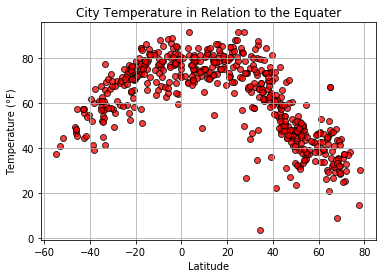

In [12]:
#create scatter for lat & temp
plt.scatter(weather_df['Lat'], weather_df['Temp'], marker='o',
            facecolor='red', edgecolor='black', alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (°F)')
plt.title('City Temperature in Relation to the Equater')